In [18]:
import cv2
import numpy
import CardExtraction
import matplotlib.pyplot as plt
import pickle
import numpy as np

clustering = pickle.load( open( "clustering.p", "rb" ) )
num_clusters = 170

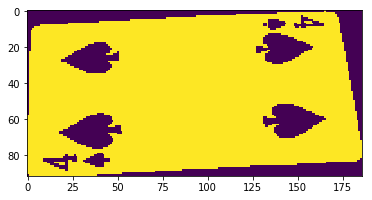

In [24]:
imgbox = CardExtraction.getCardBox('imgs/00929.png')
img = imgbox[0][imgbox[1]:imgbox[2], imgbox[3]:imgbox[4]]
plt.imshow(img)

In [20]:
def getFeatureVector(des, clustering):
    
    feature = np.zeros(num_clusters, dtype=int)
    for d in des:
        feature[clustering.predict([d])] +=1
        
    return feature

In [21]:
# img = cv2.imread("", 0)
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(img,None)

fv = getFeatureVector(des, clustering)

In [22]:
suit_classifier = pickle.load( open( "suits.p", "rb" ) )
suit_classifier.predict([fv])

In [26]:
num_classifier = pickle.load( open( "numbers.p", "rb" ) )
num_classifier.predict([fv])

array([7.])